In [ ]:
#QUE-2) Salary_hike Build a prediction model for salary_hike
#Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
#load the dataset
df=pd.read_csv('/content/sample_data/Salary_Data.csv')

In [ ]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


EDA and Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
#count duplicated rows
df[df.duplicated()].shape

(0, 2)

In [ ]:
#Renaming columns
df1=df.rename(columns={'YearsExperience':'YE','Salary':'Sal'}, inplace=False)

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Data Visualizations

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


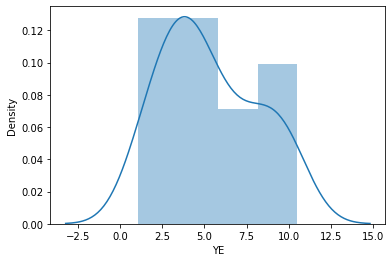

In [ ]:
sns.distplot(df1['YE'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


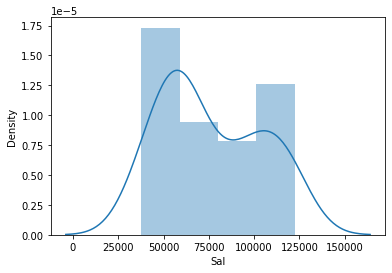

In [ ]:
sns.distplot(df1['Sal'])

In [ ]:
#correlation
df1.corr()

,YE,Sal
YE,1.000000,0.978242
Sal,0.978242,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


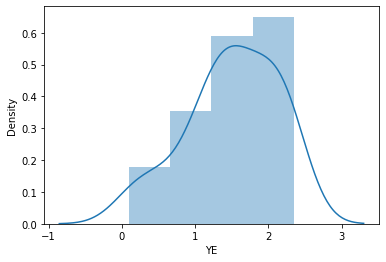

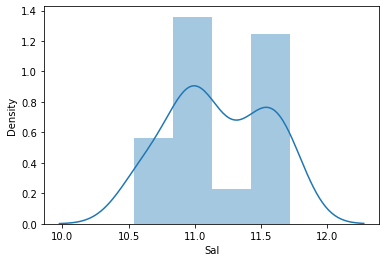

<Figure size 432x288 with 0 Axes>

In [ ]:
## Use any one transformation(LOG,LOG Square,BOX-COX) till skewness is removed
# Perform Log transformations

data=df1
data['YE'] = np.log(data['YE'])
data['Sal'] = np.log(data['Sal'])
sns.distplot(data['YE'])
fig = plt.figure()
sns.distplot(data['Sal'])
fig = plt.figure()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


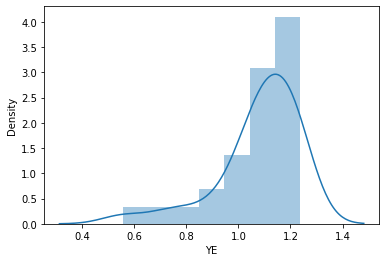

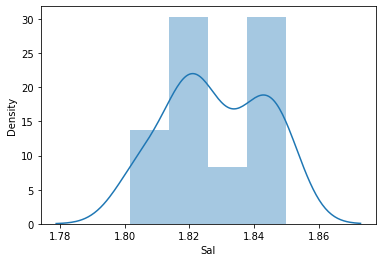

<Figure size 432x288 with 0 Axes>

In [ ]:
# Performing sqrt transformations
data_sqrt = np.sqrt(data)
data_sqrt['YE'] = np.sqrt(data_sqrt['YE'])
data_sqrt['Sal'] = np.sqrt(data_sqrt['Sal'])
sns.distplot(data_sqrt['YE'])
fig = plt.figure()
sns.distplot(data_sqrt['Sal'])
fig = plt.figure()

Model Building

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols('Sal~YE',data=df1).fit()

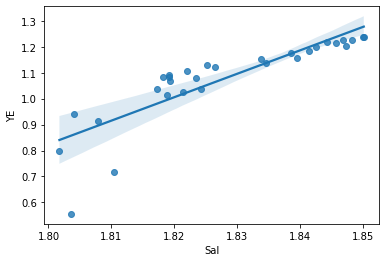

In [ ]:
sns.regplot(x=data_sqrt['Sal'],y=data_sqrt['YE'])

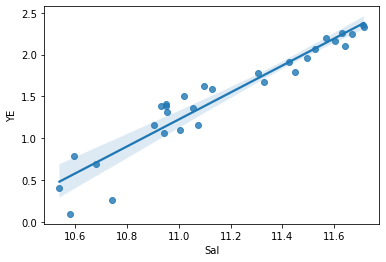

In [ ]:
sns.regplot(x=data['Sal'],y=data['YE'])

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Sal   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           7.40e-16
Time:                        09:41:46   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.000      10.214      10.442
YE             0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#finding parameters
model.params

Intercept    10.328043
YE            0.562089
dtype: float64

In [ ]:
#finding t-values and p-values
model.tvalues,model.pvalues

(Intercept    184.867959
 YE            16.352542
 dtype: float64, Intercept    9.073132e-45
 YE           7.395278e-16
 dtype: float64)

In [ ]:
#finding rsquared values
model.rsquared, model.rsquared_adj

(0.905215072581715, 0.9018298966024905)

Model Prediction

In [ ]:
print('YE using Sal')
model.predict(data)

YE using Sal


0     10.381616
1     10.475515
2     10.555951
3     10.717653
4     10.771226
5     10.926505
6     10.945561
7     10.981837
8     10.981837
9     11.063442
10    11.093033
11    11.107264
12    11.107264
13    11.121143
14    11.173468
15    11.221335
16    11.243821
17    11.265443
18    11.325724
19    11.335171
20    11.405524
21    11.429791
22    11.489804
23    11.510753
24    11.544023
25    11.563079
26    11.593469
27    11.599355
28    11.638915
29    11.649725
dtype: float64